In [1]:
#Import modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Membaca dataset
data = pd.read_csv("C:/Users/hp/DATA_MINING/UAS/long_term_cod_catch.csv")
data.head()

,Entity,Code,Year,Northern Atlantic cod catch
0,Eastern Canada,NaN,1508,156
1,Eastern Canada,NaN,1509,203
2,Eastern Canada,NaN,1510,251
3,Eastern Canada,NaN,1511,188
4,Eastern Canada,NaN,1512,125


In [2]:
data.rename(columns = {"Northern Atlantic cod catch": "catch"}, inplace=True)
data.head()
# df.rename(columns = {"Year": "Tahun", "Actor": "Aktor"}, inplace=True)

,Entity,Code,Year,catch
0,Eastern Canada,NaN,1508,156
1,Eastern Canada,NaN,1509,203
2,Eastern Canada,NaN,1510,251
3,Eastern Canada,NaN,1511,188
4,Eastern Canada,NaN,1512,125


In [3]:
# Menampilkan informasi kolom dan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  512 non-null    object 
 1   Code    0 non-null      float64
 2   Year    512 non-null    int64  
 3   catch   512 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 16.1+ KB


In [4]:
# merangkum data
data.describe()

,Code,Year,catch
count,0.0,512.000000,512.000000
mean,NaN,1763.500000,97047.992188
std,NaN,147.945936,116049.251883
min,NaN,1508.000000,84.000000
25%,NaN,1635.750000,7970.750000
50%,NaN,1763.500000,52180.000000
75%,NaN,1891.250000,152500.000000
max,NaN,2019.000000,810014.000000


In [5]:
data.drop(['Entity','Code'], axis=1, inplace=True)
data.head()


,Year,catch
0,1508,156
1,1509,203
2,1510,251
3,1511,188
4,1512,125


In [6]:
# Memisahkan fitur dan target
X = data.drop("catch", axis=1)  # Ganti "target_column" dengan nama kolom target yang sesuai
y = data["Year"]

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Anda dapat menyesuaikan parameter sesuai kebutuhan

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)


In [7]:
# Menghitung rata-rata kesalahan kuadrat
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5066019417475744


In [8]:
# Menghitung nilai Mean Squared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan hasil evaluasi
print("R Mean Squared Error (RMSE):", rmse)

R Mean Squared Error (RMSE): 0.7117597500193267


In [9]:
from sklearn.metrics import r2_score

# Menghitung R2-score
r2 = r2_score(y_test, y_pred)
print("R2-score:", r2)

R2-score: 0.9999779086410625


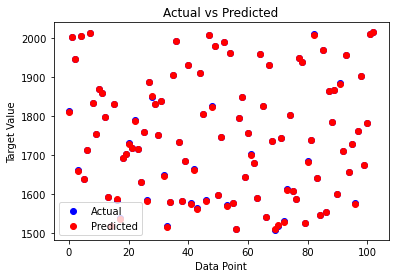

In [10]:
# Visualisasi titik prediksi
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [14]:
import pickle
pickle.dump(model, open("modelbaru.pkl", "wb"))